In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the csv data file to a data frame object 
df = pd.read_csv('death2014.csv')

# Initial exploration of the file by looking at the top several rows
df.head(10)

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Country or Area,Year,Area,Sex,Age,Cause of death (WHO),Record Type,Reliability,Source Year,Value,Value Footnotes
0,Australia,2014,Total,Male,Total,"Certain infectious and parasitic diseases, ICD10",Data tabulated by year of occurrence,"Final figure, complete",2016.0,1411.0,NaN
1,Australia,2014,Total,Male,Total,"Intestinal infectious diseases, ICD10",Data tabulated by year of occurrence,"Final figure, complete",2016.0,116.0,NaN
2,Australia,2014,Total,Male,Total,"Tuberculosis, ICD10",Data tabulated by year of occurrence,"Final figure, complete",2016.0,29.0,NaN
3,Australia,2014,Total,Male,Total,"Tetanus, ICD10",Data tabulated by year of occurrence,"Final figure, complete",2016.0,0.0,NaN
4,Australia,2014,Total,Male,Total,"Diphtheria, ICD10",Data tabulated by year of occurrence,"Final figure, complete",2016.0,0.0,NaN
5,Australia,2014,Total,Male,Total,"Whooping cough, ICD10",Data tabulated by year of occurrence,"Final figure, complete",2016.0,2.0,NaN
6,Australia,2014,Total,Male,Total,"Meningococcal infection, ICD10",Data tabulated by year of occurrence,"Final figure, complete",2016.0,2.0,NaN
7,Australia,2014,Total,Male,Total,"Septicaemia, ICD10",Data tabulated by year of occurrence,"Final figure, complete",2016.0,785.0,NaN
8,Australia,2014,Total,Male,Total,"Acute poliomyelitis, ICD10",Data tabulated by year of occurrence,"Final figure, complete",2016.0,0.0,NaN
9,Australia,2014,Total,Male,Total,"Measles, ICD10",Data tabulated by year of occurrence,"Final figure, complete",2016.0,0.0,NaN


In [64]:
# Cleansing file to filter out rows that represent subtotals and would result in "double counting"
df = df[(df["Cause of death (WHO)"] != 'All causes, ICD10') & (df['Age'] != 'Total')]

# Run an analysis to identify the leading cause of death
# We'll use this for the next analysis running some summary stats on the leading cause of death
df1 = df.groupby("Cause of death (WHO)").Value.sum().reset_index().sort_values("Value", ascending=False)

# View the results
df1


,Cause of death (WHO),Value
17,"Diseases of the circulatory system, ICD10",1866259.0
56,"Neoplasms, ICD10",932507.0
51,"Malignant neoplasms, ICD10",907082.0
38,"Ischaemic heart diseases, ICD10",818948.0
9,"Cerebrovascular diseases, ICD10",408718.0
23,"Diseases of the respiratory system, ICD10",286255.0
28,"External causes, ICD10",256944.0
62,"Symptoms, signs and abnormal clinical and labo...",200894.0
18,"Diseases of the digestive system, ICD10",190346.0
50,"Malignant neoplasm of trachea, bronchus and lu...",177729.0


In [67]:
# Analysis running summary stats on the leading cause of death identified from the above analysis 
# spread across countries

# Create another data frame object containing only rows of the leading casue of death identified previously
df2 = df[(df["Cause of death (WHO)"] == 'Diseases of the circulatory system, ICD10')]

# Create one more data frame object grouping the data to compare total numbers by country
df3 = df.groupby("Country or Area").Value.sum().reset_index().sort_values("Value", ascending=False)


# Set values from the data frame
Deaths = df3.Value

# Describe the data with some summary stats on Central Tendency and Variance

def DeathStats(Deaths):
    print("Mean: ",np.mean(Deaths))
    print("Median: ",np.median(Deaths))
    print("Variance: ",np.var(Deaths))
    print("Standard Deviation:",np.std(Deaths))
    print("Standard Error:",np.std(Deaths)/np.sqrt(len(Deaths)-1))

print("Stats on 2014 # of deaths per country caused by diseases of the circulatory system, the highest cause of death")

DeathStats(Deaths)



Stats on 2014 # of deaths per country caused by diseases of the circulatory system, the highest cause of death
Mean:  254018.9090909091
Median:  105947.0
Variance:  139546978107.4766
Standard Deviation: 373559.87218580715
Standard Error: 66036.67970044105


Analysis of countries with the top # of deaths


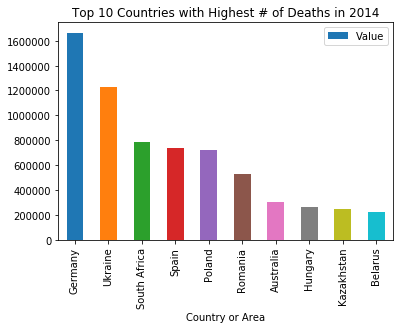

In [31]:
# Analysis of Countries with the top # of deaths
print("Analysis of countries with the top # of deaths")

# Grouping by Country or Area to get total deaths per country with descending sort
df = df.groupby("Country or Area").Value.sum().reset_index().sort_values("Value", ascending=False)

# Here is a bar graph of the Countries with the top 10 # deaths. We set the label names and title of the graph
df = df.head(10)
df.plot.bar(x="Country or Area", y='Value')
plt.title('Top 10 Countries with Highest # of Deaths in 2014' )
plt.show()

Analysis of top causes of deaths


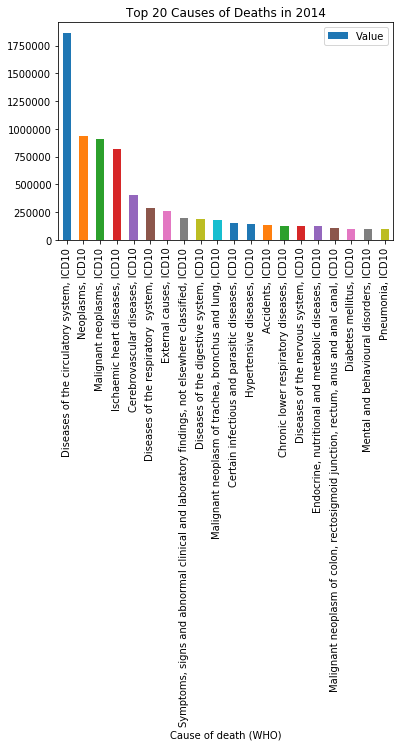

In [34]:
# Analysis of top 20 causes of Deaths
print("Analysis of top causes of deaths")
# Grouping by Cause of Death and descending sort on the sum of Value column
df = df.groupby("Cause of death (WHO)").Value.sum().reset_index().sort_values("Value", ascending=False)

# Here is a bar graph of the the top 20 cause of deaths. We set the label names and title of the graph
df = df.head(20)
df
df.plot.bar(x="Cause of death (WHO)", y='Value')
plt.title('Top 20 Causes of Deaths in 2014' )
plt.show()

Analysis of infant mortality by sex


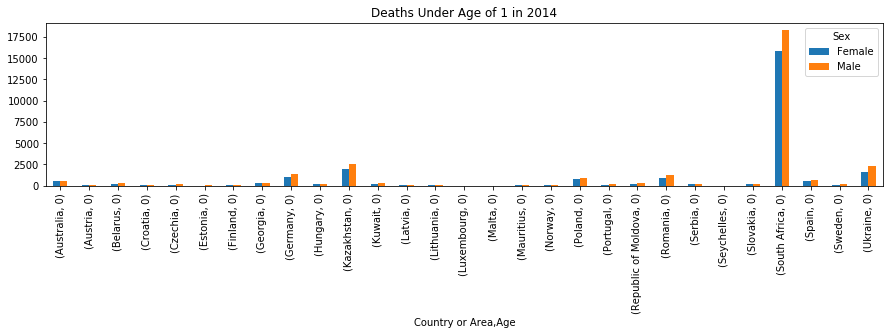

In [51]:
# Analysis of infant mortality (ages under 1 year old)
print("Analysis of infant mortality by gender")


# Grouping by Cause of Death
#df = df.groupby(["Cause of death (WHO)",'Sex']).Value.sum()
#.reset_index().sort_values("Value", ascending=False)
#df
# Here we just want to show a bar graph of the Countries with the top 20 # deaths. We set the label names and title of the graph
#df = df.loc[df.Age.str.match("0", na=False)]
#df

fig, ax = plt.subplots(figsize=(15,3))
plt.title('Deaths Under Age of 1 in 2014' )
# use unstack()
df.groupby(["Country or Area",'Age','Sex']).Value.sum().unstack().plot.bar(ax=ax)

